Accuracy: 0.9611111111111111
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  1  1  0  0 27  0]
 [ 0  0  0  0  0  1  0  0  2 37]]


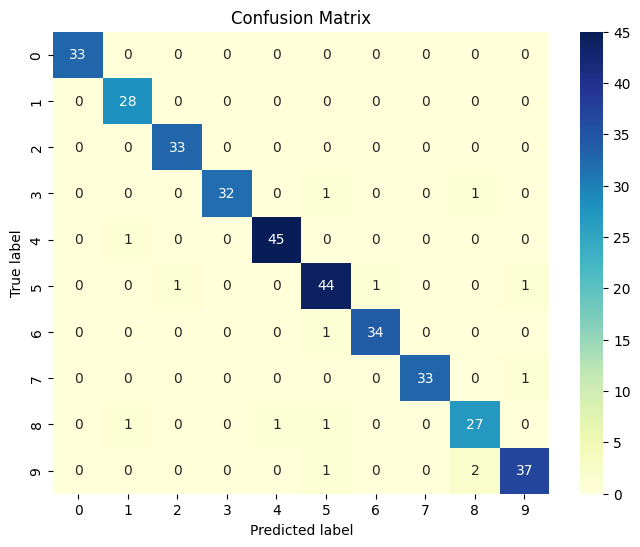

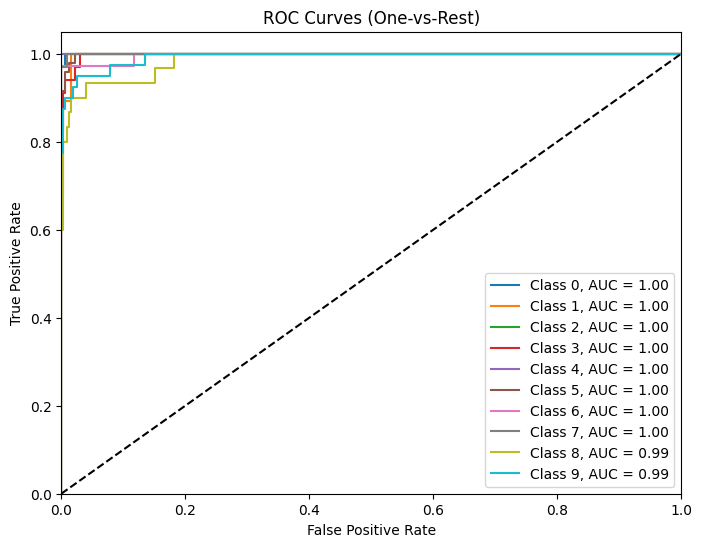

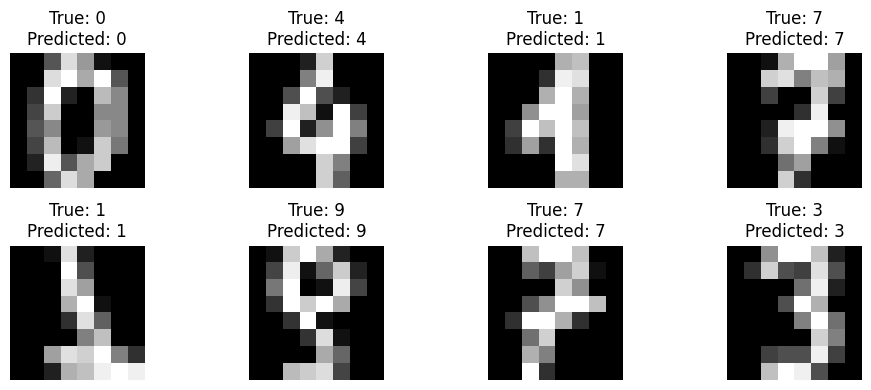

In [41]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Загрузка данных
digits = load_digits()

# Нормализация данных
X = digits.data / 16.0
y = digits.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели метода опорных векторов
svm_model = OneVsRestClassifier(SVC(kernel='linear', C=1.0, probability=True, random_state=42))
svm_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = svm_model.predict(X_test)

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC кривая для многоклассовой классификации
y_test_bin = label_binarize(y_test, classes=range(10))  # Бинаризация меток классов
y_score = svm_model.decision_function(X_test)  # Получение оценок для каждого класса

# Вычисление ROC кривой и AUC для каждого класса
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC кривых для всех классов
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Визуализация изображений из набора данных CIFAR-10 с предсказаниями модели
plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices_to_view):
    plt.subplot(2, 4, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"True: {digits.target[idx]}\nPredicted: {svm_model.predict([X[idx]])[0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [55]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Загрузка изображения
image_path = '1.png'  # Замените на путь к вашему изображению
image = mpimg.imread(image_path)

# Преобразование изображения в оттенки серого
image_gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Нормализация данных
image_normalized = image_gray / 16.0

# Проверка размера изображения
if image_normalized.shape != (8, 8):
    raise ValueError("Изображение должно быть размером 8x8 пикселей.")

# Преобразование в формат, который можно использовать для предсказаний
image_flattened = image_normalized.flatten()

# Предсказание класса на фотографии
predicted_class = svm_model.predict([image_flattened])

print(f"Predicted class: {predicted_class[0]}")

# Визуализация изображения и предсказанного класса
plt.figure(figsize=(4, 4))
plt.imshow(image_gray, cmap='gray')
plt.title(f"Predicted: {predicted_class[0]}")
plt.axis('off')
plt.show()

ValueError: Изображение должно быть размером 8x8 пикселей.